This notebook is used to analyse the model runs for no discharge and with discharge scenarios and to plot the original streamflow data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the weiherbach and schwarzbach data
#With discharge
file_path = r'y_obs.csv'
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
y_sim.set_index(y_sim.columns[0],inplace=True)
file_path = rf"..\withoutdischarge_eobs_ungauged\y_sim.csv"
y_sim_no_disch = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim_no_disch.set_index(y_sim_no_disch.columns[0],inplace=True)

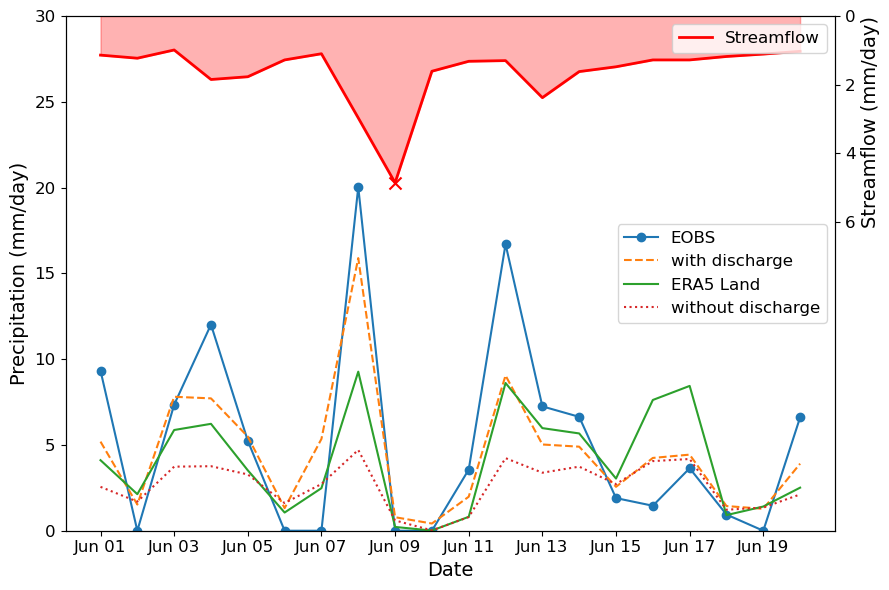

In [ ]:
import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')
   

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    #ax1.set_title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    ax1.legend(loc='center right', fontsize=12)
    ax1.set_ylim([0, 30])
    # Formatting tick labels
    ax1.tick_params(axis='both', labelsize=12)
    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2016-06-09'), streamflow_filtered.loc['2016-06-09'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 15])
    ax2.set_yticks([0,2,4,6])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()
   
    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    #plt.savefig(r"C:\Users\ashis\Github\lstm_backward\results\withoutdischarge_ungauged\withoutdischarge_event.jpeg",dpi=1200)
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"testde_2.csv"
csv_path1 = rf"precip_eobs_schwarzbach.csv"
start_date = '2016-06-01'
end_date = '2016-06-20'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date)

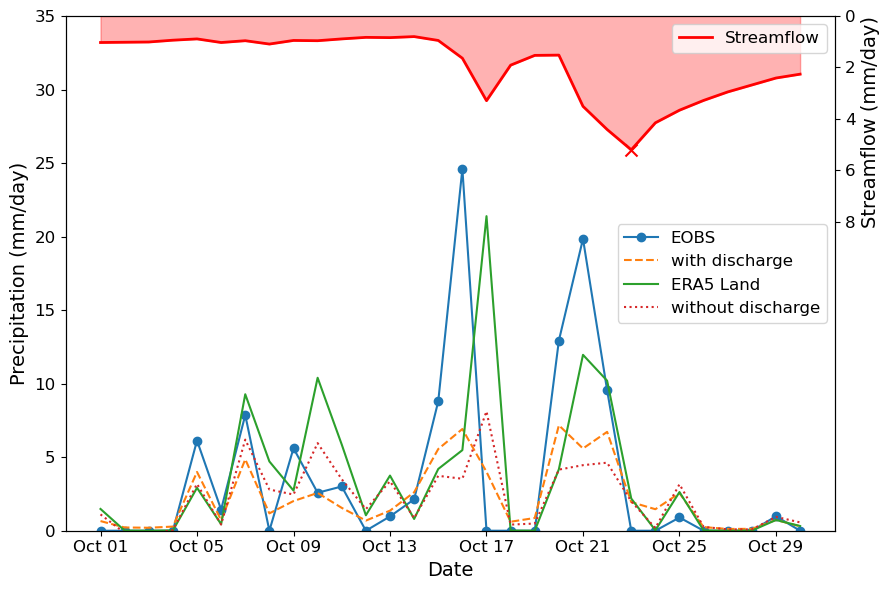

In [6]:
import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: Hoelzlebruck (camelsch_4003) from {start_date} to {end_date}')
    ax1.set_ylim([0, 35])
    ax1.tick_params(axis='both', labelsize=12)

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2014-10-23'), streamflow_filtered.loc['2014-10-23'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 20])
    ax2.set_yticks([0,2,4,6,8])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

        # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()

    
    # Show the plot
    #plt.savefig('hydrograph.jpeg',dpi=1200)
    plt.show()

# Example Usage
catchment = 'camelsch_4003'  # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelsch_4003.csv"
start_date = '2014-10-01'
end_date = '2014-10-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

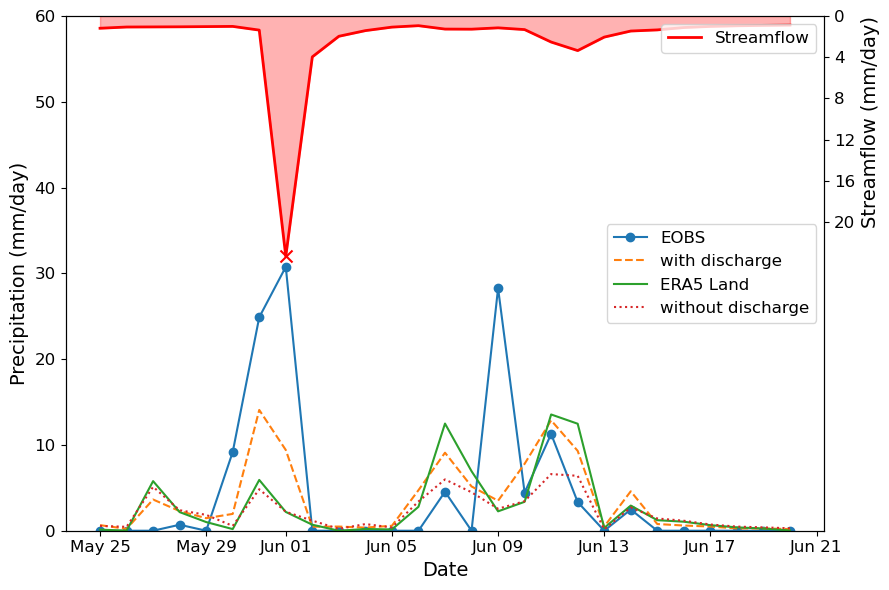

In [ ]:
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: Ernz (camelslx_55) from {start_date} to {end_date}')
    ax1.tick_params(axis='both', labelsize=12)
    ax1.set_ylim([0, 60])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2018-06-01'), streamflow_filtered.loc['2018-06-01'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 50])
    ax2.set_yticks([0,4,8,12,16,20])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    #plt.savefig('hydrograph.jpeg',dpi=1200)
    plt.show()

catchment = 'camelslx_055' # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
start_date = '2018-05-25'
end_date = '2018-06-20'
csv_path1 = rf"precip_eobs_camelslx_55.csv"

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

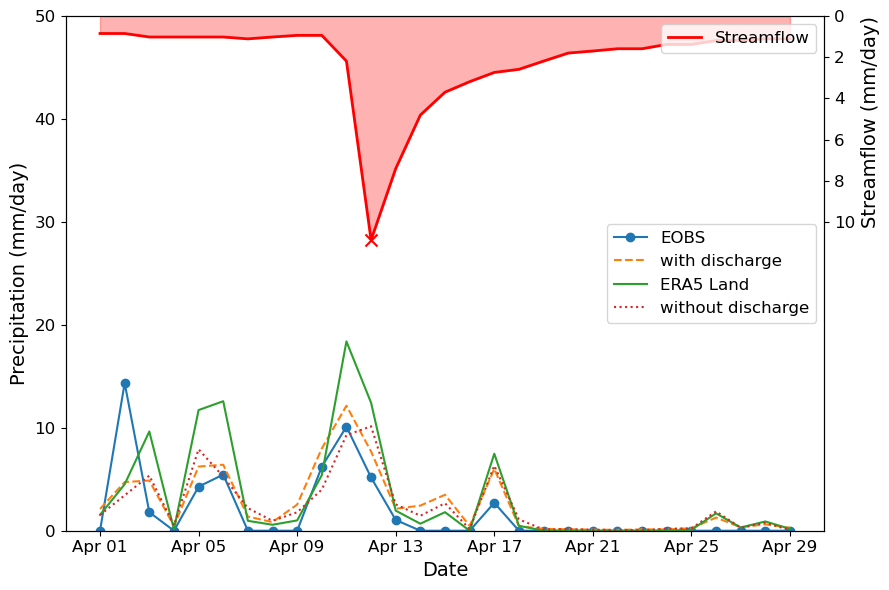

In [8]:
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    era5_df_filtered = streamflow_df.loc[start_date:end_date, 'total_precipitation_sum']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='EOBS', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with discharge', linestyle='--')
    ax1.plot(era5_df_filtered.index, era5_df_filtered, label='ERA5 Land', linestyle='-')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    ax1.legend(loc='center right', fontsize=12)
    #ax1.set_title(f'Catchment: SUEIRO (camelses_1414) from {start_date} to {end_date}')
    ax1.set_ylim([0, 50])
    ax1.tick_params(axis='both', labelsize=12)

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.scatter(pd.to_datetime('2002-04-12'), streamflow_filtered.loc['2002-04-12'], color='red', s=75,marker='x', zorder=5)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.set_ylim([0, 25])
    ax2.set_yticks([0,2,4,6,8,10])
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()

    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%b %d')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    #plt.savefig('hydrograph.jpeg',dpi=1200)
    plt.show()

# Example Usage
catchment = 'camelses_1414'  # Specify the column name corresponding to the catchment
csv_path = rf".\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelses_1414.csv"
start_date = '2002-04-01'
end_date = '2002-04-29'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)